## Shopify Technical Challenge



On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [3]:
data.shape

(5000, 7)

### Check for null values

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

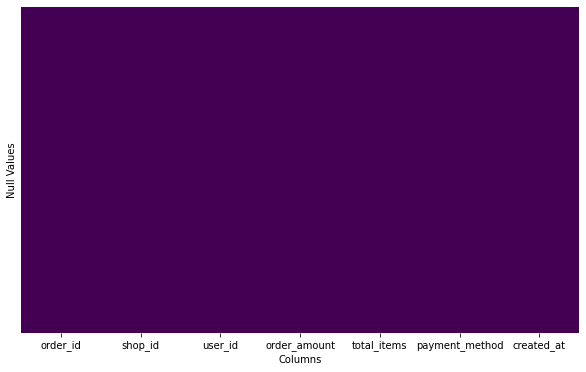

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.xlabel("Columns")
plt.ylabel("Null Values")
plt.show
np.sum(data.isna())

No null values are present in the dataset, so we can proceed.

### Calculate AOV (average order value)

In [5]:
all_AOV = np.mean(data['order_amount'])

In [6]:
data['total_items'].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64


## Analyzing the AOV

By simply calculating the mean of order_amount, the AOV returned is 3,145, which is very high.

For the price of regular sneakers, having an AOV of $3,145 across all stores is peculiar unless they are sold in bulk. But this is not the case since most of the orders only have 1 or 2 items. Let's look deeper into the numbers of each store.



In [7]:
shop_total = data.groupby(by='shop_id').sum().sort_values(by='order_amount', ascending=False).reset_index()
shop_total['Amount_per_item'] = shop_total['order_amount']/shop_total['total_items']
shop_total[:10]

,shop_id,order_id,user_id,order_amount,total_items,Amount_per_item
0,42,124538,38688,11990176,34063,352.0
1,78,122499,39916,2263800,88,25725.0
2,89,172859,50618,23128,118,196.0
3,81,158452,49317,22656,128,177.0
4,6,143483,49818,22627,121,187.0
5,13,151982,54549,21760,136,160.0
6,59,156803,50728,21538,121,178.0
7,71,172484,56442,21320,130,164.0
8,19,173312,53430,20538,126,163.0
9,70,146722,49301,20241,117,173.0


## Analyzing performance by shop

We calculate the order_amount by shop and sort them by the highest amount, and add the amount per item by dividing total items by order amount. 
Here we see that two shops, shop 42 and 78, have significantly higher order amounts than the rest. Shop 42 also seems to be selling exceedingly well, with 34,063 total items sold. Must be a very popular model.

On the other hand, shop 78 sold fewer items than the other shops but the order_amount of all the items is much higher. We can see this is due to them having the highest amount per item, at $25,725 each. 

With these extraordinary figures, the order amounts from shop 42 and 78 skewed the value of AOV and should be removed from the calculation of AOV as they are significant outliers.

## Metric: AOV by Segment

Not all sneaker shops are made equal, and since each shop sells only one model, they certainly aren't. A better way of generating AOV in this case is to look at the AOV by segment. Here we will look at the AOV by shop and the AOV by user.

,shop_id,AOV,Avg_items
0,42,235101.490196,667.901961
1,78,49213.043478,1.913043
2,50,403.545455,2.090909
3,90,403.224490,2.265306
4,38,390.857143,2.057143
5,81,384.000000,2.169492
6,6,383.508475,2.050847
7,89,379.147541,1.934426
8,33,376.275000,2.175000
9,51,361.804348,1.934783


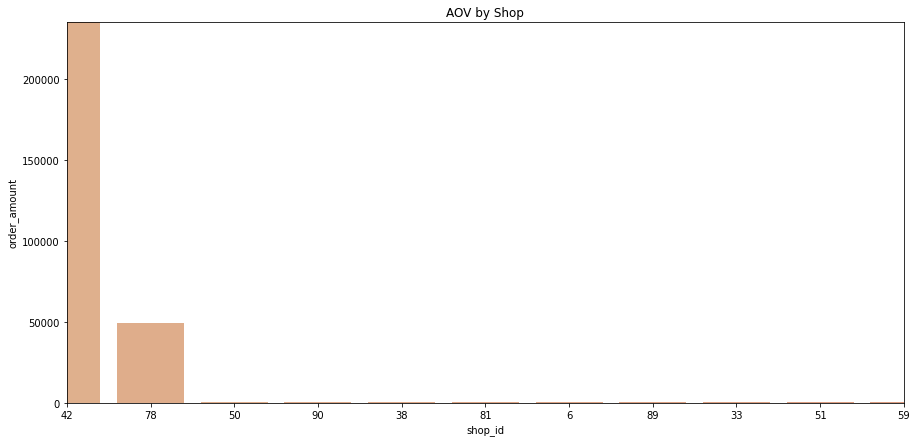

In [8]:
shop_AOV = data.groupby(by='shop_id').mean().sort_values(by='order_amount', ascending=False).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(data=shop_AOV, y='order_amount', x='shop_id', order= shop_AOV.sort_values(by='order_amount', 
                                                                                ascending=False).shop_id, palette="flare")
plt.xlim(0, 10)
plt.ylim(0, np.max(shop_AOV['order_amount']))
plt.title('AOV by Shop')

shop_AOV.rename(columns={'order_amount':'AOV', 'total_items':'Avg_items'}, inplace=True)
shop_AOV[['shop_id','AOV','Avg_items']].iloc[:10]

We grouped by shop and calculated the average values for each. As expected, 42 and 78 have the highest AOV, contributing to the overall AOV of all shops. From the 10 top sneaker shops, only shop 42 has average items above 2 and actually has 667 average items, so it most likely sells sneakers in bulk instead of individually.

,user_id,AOV,Avg_items
0,607,704000.000000,2000.000000
1,878,14266.909091,2.181818
2,766,8007.600000,2.300000
3,834,6019.000000,2.111111
4,915,5785.142857,2.071429
5,962,5743.428571,1.714286
6,775,5069.625000,1.750000
7,817,5061.750000,1.875000
8,928,5041.750000,1.750000
9,855,4759.705882,1.588235


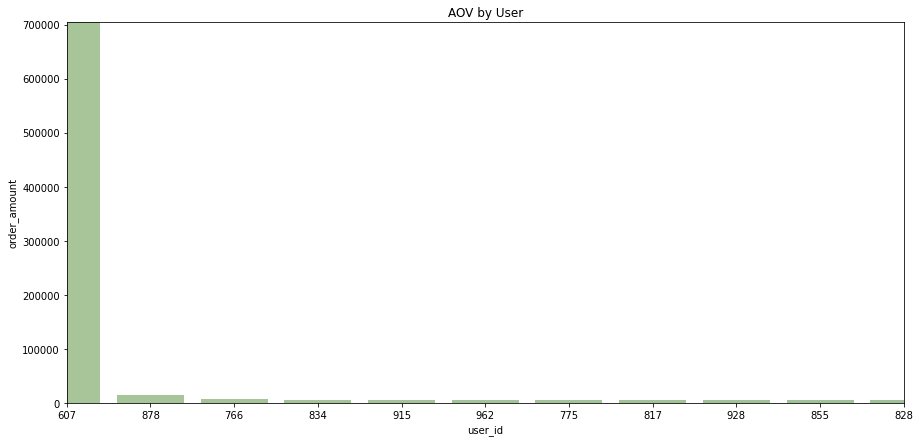

In [9]:
user_AOV = data.groupby(by='user_id').mean().sort_values(by='order_amount', ascending=False).reset_index()

plt.figure(figsize=(15,7))
sns.barplot(data=user_AOV, y='order_amount', x='user_id', order= user_AOV.sort_values(by='order_amount', 
                                                            ascending=False).user_id, palette='crest')
plt.xlim(0, 10)
plt.ylim(0, np.max(user_AOV['order_amount']))
plt.title('AOV by User')

user_AOV.rename(columns={'order_amount':'AOV', 'total_items':'Avg_items'}, inplace=True)
user_AOV[['user_id','AOV', 'Avg_items']].iloc[:10]

Grouping by users, we see some interesting observations. User 607 have both the highest AOV and average items, with an average order of 2000 items and AOV of $704,000. With this kind of order volume, this customer is likely a reseller who buys in bulk and is not a typical customer. 


The next users seem to be a high-end customers who purchase expensive sneakers, given an AOV of thousands of dollars for an average of 2 items. From these figures we can look at AOV from the customer perspective and identify different groups from high end customers, enterprise, and regular customers and further cluster them for analysis.

,shop_id,AOV,Cum_percent
0,42,235101.490196,74.948653
1,78,49213.043478,90.637415
2,50,403.545455,90.766063
3,90,403.224490,90.894608
4,38,390.857143,91.019210
5,81,384.000000,91.141626
6,6,383.508475,91.263886
7,89,379.147541,91.384756
8,33,376.275000,91.504709
9,51,361.804348,91.620050


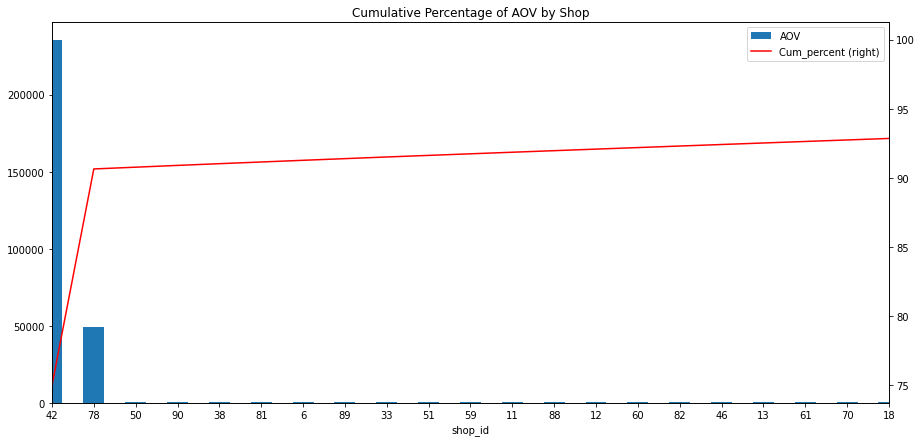

In [10]:
shop_AOV['Cum_percent'] = 100*(shop_AOV['AOV'].cumsum() / shop_AOV['AOV'].sum())
shop_AOV[['shop_id','AOV','Cum_percent']].iloc[:10]

fig, axes = plt.subplots(figsize=(15,7))
ax1 = shop_AOV.plot(x='shop_id', y='AOV',  kind='bar', ax=axes)
ax2 = shop_AOV.plot(y='Cum_percent', kind='line', color='red', ax=axes, secondary_y=True)
ax2.set_xlim([0,20])

plt.title('Cumulative Percentage of AOV by Shop')

shop_AOV[['shop_id','AOV','Cum_percent']].iloc[:10]


Going back to AOV by shops segment, we calculate the cumulative percentage of each shop's AOV to the overall AOV in this pareto chart. From the chart we see that shop 42 and 78 together contribute over 90% of the AOV. With these values in the calculation, the original AOV does not accurately represent majority of the shops. 

### Conclusion

A good overall AOV metric would look at excluding the shops 78, 42, and user 607 as outliers, however, I propose a better metric would be AOV by segment. In AOV by segment, we have a clearer picture of the performance of the shops and type of sneaker models that are high performing and those that are not performing as well. Additionally, average order items give an indication of performance by volume, which will be more suited for shops that have volume targets where average order items. Moving forward, further analysis can be conducted on shops that sell sneakers in certain price ranges and the type of customers it attracts to determine other key metrics that correspond to them. 